In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os

In [33]:
directory_path = '../../../Data_sets/Quick_Start/complete_data/'
path_list = ["gene_expression_summary.csv","MDS_UPDRS_III_filtered_with_event.csv",
             "PDMRI_Clean_Merged_6_13_25.csv"]

for i in range(len(path_list)):
            path_list[i] = directory_path + path_list[i]

df_list = []

for s in path_list:
    i = path_list.index(s)
    D = pd.read_csv(s)
    df_list.append(D)

print(df_list[1])

        PATNO  NHY Origin_of_entry EVENT_ID
0        3000  0.0         02/2011       BL
1        3000  0.0         03/2012      V04
2        3000  0.0         02/2013      V06
3        3000  0.0         05/2014      V08
4        3000  0.0         03/2015      V10
...       ...  ...             ...      ...
30850  444383  0.0         05/2025       BL
30851  446733  2.0         05/2025       BL
30852  446733  2.0         05/2025       BL
30853  466157  2.0         05/2025       BL
30854  466157  2.0         05/2025       BL

[30855 rows x 4 columns]


In [34]:
from functools import reduce

merged_df = reduce(
    lambda left, right: pd.merge(
        left, right, on=['PATNO', 'EVENT_ID'], how='inner', suffixes=('', '_drop')
    ),
    df_list
)

merged_df = merged_df.drop(columns=['NHY_drop'])
print(merged_df.info())
print(merged_df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PATNO                          374 non-null    int64  
 1   EVENT_ID                       374 non-null    object 
 2   ENSG00000188906                374 non-null    float64
 3   ENSG00000185345                374 non-null    float64
 4   ENSG00000158828                374 non-null    float64
 5   ENSG00000145335                374 non-null    float64
 6   ENSG00000159082                374 non-null    float64
 7   ENSG00000116288                374 non-null    float64
 8   ENSG00000116675                374 non-null    float64
 9   ENSG00000177628                374 non-null    float64
 10  ENSG00000100225                374 non-null    float64
 11  ENSG00000184381                374 non-null    float64
 12  NHY                            374 non-null    flo

In [40]:
merged_df.EVENT_ID.unique()

array(['BL'], dtype=object)

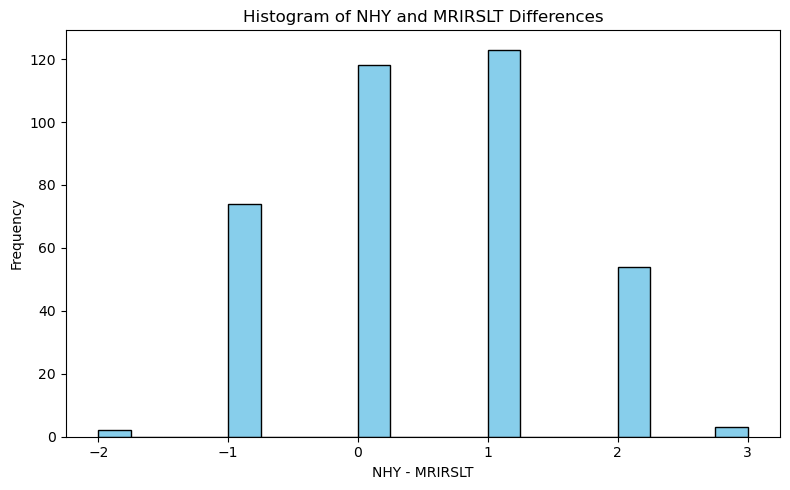

In [44]:
D = merged_df.MRIRSLT-merged_df.NHY
plt.figure(figsize=(8, 5))
plt.hist(D, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('NHY - MRIRSLT')
plt.ylabel('Frequency')
plt.title('Histogram of NHY and MRIRSLT Differences')
plt.tight_layout()
plt.show()


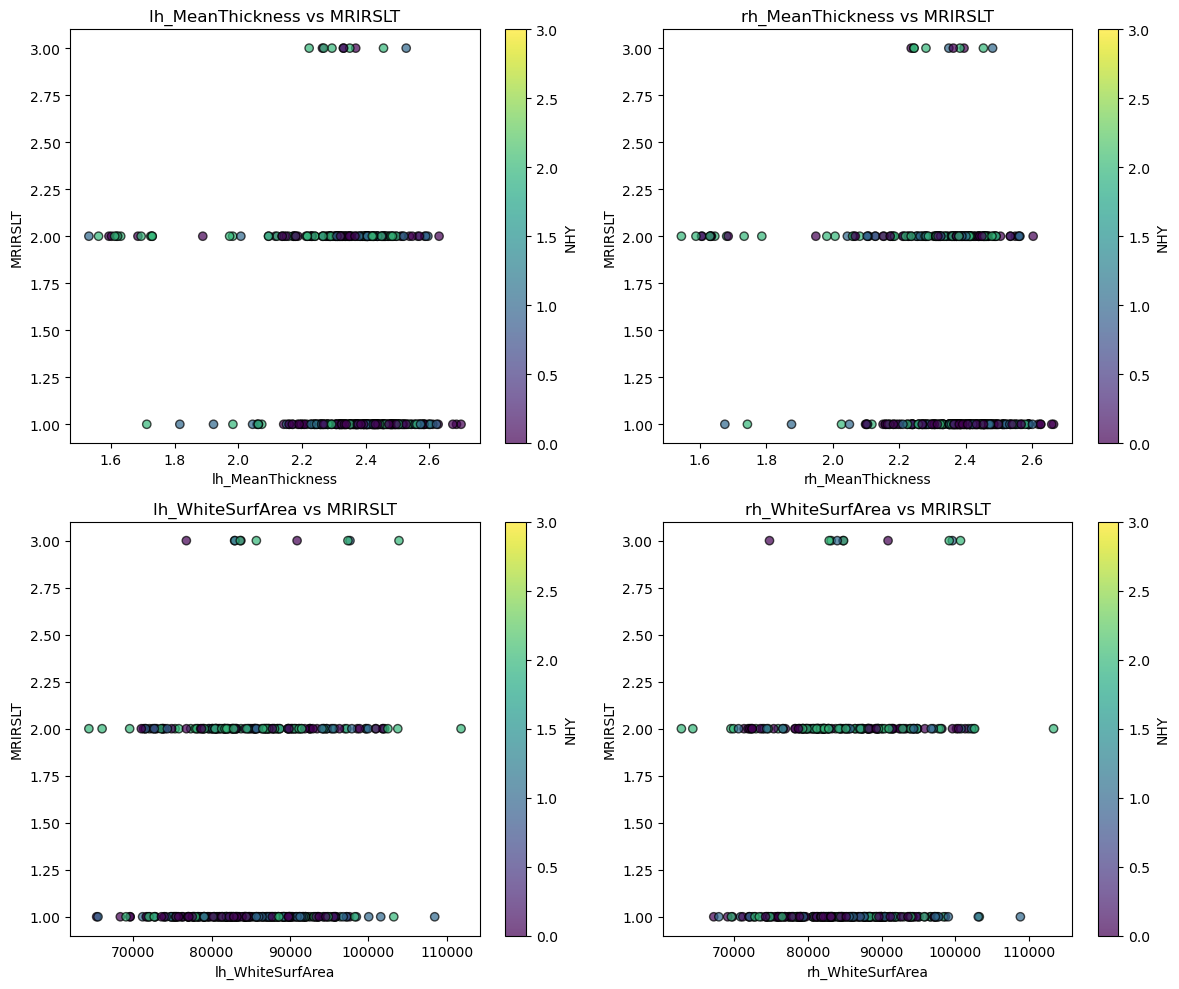

In [45]:

cols_to_plot = [col for col in merged_df.columns if col.lower().endswith('_meanthickness') or 
                col.lower().endswith('_whitesurfarea')]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, col in enumerate(cols_to_plot):
    scatter = axes[idx].scatter(
        merged_df[col], merged_df['MRIRSLT'],
        c=merged_df['NHY'], cmap='viridis', alpha=0.7, edgecolor='k'
    )
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('MRIRSLT')
    axes[idx].set_title(f'{col} vs MRIRSLT')
    cbar = fig.colorbar(scatter, ax=axes[idx])
    cbar.set_label('NHY')

plt.tight_layout()
plt.show()